<figure>
<IMG SRC="../../lectures/images/PhysicsLogo.jpg" WIDTH=100 ALIGN="right">
</figure>
# [Physics 411](http://jklymak.github.io/Phy411/) Time Series Analysis
*Jody Klymak*


# Assignment 7

### **Q1** Frequency-domain filtering

<div style='background:#F0F0F0'>  Consider a time series with a sharp jump in the middle as in the notes:
</div>

In [1]:
import numpy.random as random
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

N=1001
dt=1.
t=np.arange(0,N*dt,dt)

x = np.cumsum(np.random.randn(N)) # red noise
f0=0.03 # Hz
x = x+ 40.*np.sin(f0*2*np.pi*t) # + sine wave
x=x-np.mean(x)
noise = 60.*np.random.randn(N)
xn = x+noise
xn[N/2:]=xn[N/2:]-2000.
# remove the mean!!
xn = xn-np.mean(xn)

<div style='background:#F0F0F0'>**1** Implement a low-pass filter of the data in the frequency domain, with a cutoff frequency of $f_c=0.06\ Hz$.</div>
   
  1. plot the signal and the smoothed signal (suggest zooming in on the step).
  2. plot the spectral response $|H(f)|$
  3. plot the phase response $\mathrm{angle}(H(f))$.

<div style='background:#F0F0F0'>
Be sure to comment on how good your filter is.
</div>

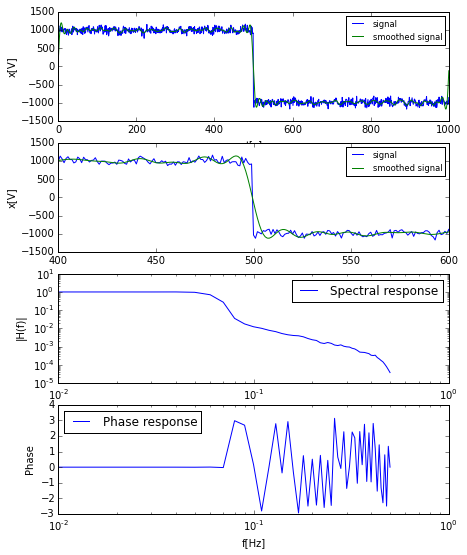

In [15]:
X=np.fft.fft(xn)

N=np.shape(xn)[0]
ff=np.linspace(0,1./dt,N)
fc=0.06
X[(ff>fc)&(ff<(1./dt-fc))]=1.e-15
y=np.real(np.fft.ifft(X))+np.mean(xn)
nfft=100
Gyy,fy= mlab.psd(y,NFFT=nfft, Fs=1./dt, noverlap=nfft/2., window=mlab.window_hanning)
Gxx,fx= mlab.psd(xn,NFFT=nfft,Fs=1./dt, noverlap=nfft/2., window=mlab.window_hanning)
absH= np.sqrt(Gyy/Gxx)
Gxy, fxy= mlab.csd(xn,y,NFFT=nfft,Fs=1./dt, noverlap=nfft/2., window=mlab.window_hanning)
ang= np.angle(Gxy)

fig,ax=plt.subplots(4,1,figsize=(7,9))
ax[0].plot(t,xn,label='signal')
ax[0].plot(t,y,label='smoothed signal')
ax[0].set_ylabel('x[V]'); ax[0].set_xlabel('t[s]')
ax[0].legend(fontsize='small')

ax[1].plot(t,xn,label='signal')
ax[1].plot(t,y,label='smoothed signal')
ax[1].set_ylabel('x[V]'); ax[0].set_xlabel('t[s]')
ax[1].legend(fontsize='small')
ax[1].set_xlim((400,600))
#Spectral response
ax[2].loglog(fy, absH, label='Spectral response')
ax[2].set_xlabel('f[Hz]')
ax[2].set_ylabel('|H(f)|')
ax[2].legend(loc=0)

#Phase response
ax[3].semilogx(fy, ang, label='Phase response')
ax[3].set_xlabel('f[Hz]')
ax[3].set_ylabel('Phase')
ax[3].legend(loc=0)

The Filter is ok for a first try. It certainly gives a smoothed signal that is in the same general location of the original signal. But at the step, the roll off is very wide/slow. For high frequencies, there is a sudden place where the spectral response begins to deviate from 1, and the Phase Repsonce begins to deviate from 0.  

<div style='background:#F0F0F0'>**2** Now repeat the above but apply a Hanning window to the frequency window *before* you apply it to the FFT of $x_n$.  Comment on how well the filter is doing when you do this.  (Its helpful to keep the previous result up)  (It is OK to use the `hanning` function)
</div>

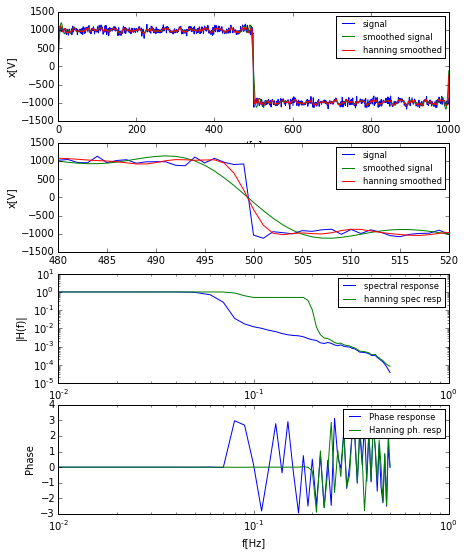

In [16]:
Xh=np.fft.fft(xn)
ff=np.linspace(0,1./dt,N)
hann=0.*ff
hann=np.hanning(1001)
#ffh=np.convolve(ff,hann,mode='same')
ffh=ff*hann
Xh[(ffh>fc)&(ffh<(1./dt-fc))]=1.e-15
yh=np.real(np.fft.ifft(Xh))+np.mean(xn)

Gyyh,fy= mlab.psd(yh,NFFT=nfft, Fs=1./dt, noverlap=nfft/2, window=mlab.window_hanning)
absHh= np.sqrt(Gyyh/Gxx)
Gxyh, fxy= mlab.csd(xn,yh,NFFT=nfft,Fs=1./dt, noverlap=nfft/2, window=mlab.window_hanning)
angh= np.angle(Gxyh)


fig,ax=plt.subplots(4,1,figsize=(7,9))
ax[0].plot(t,xn,label='signal')
ax[0].plot(t,y,label='smoothed signal')
ax[0].plot(t,yh, label='hanning smoothed')
ax[0].set_ylabel('x[V]'); ax[0].set_xlabel('t[s]')
ax[0].legend(fontsize='small')

ax[1].plot(t,xn,label='signal')
ax[1].plot(t,y,label='smoothed signal')
ax[1].plot(t,yh, label='hanning smoothed')
ax[1].set_ylabel('x[V]'); ax[0].set_xlabel('t[s]')
ax[1].legend(fontsize='small')
ax[1].set_xlim((480,520))

#Spectral response
ax[2].loglog(fy, absH, label='spectral response')
ax[2].loglog(fy, absHh, label='hanning spec resp')
ax[2].set_xlabel('f[Hz]')
ax[2].set_ylabel('|H(f)|')
ax[2].legend(fontsize='small')

#Phase response
ax[3].semilogx(fy, ang, label='Phase response')
ax[3].semilogx(fy, angh,label='Hanning ph. resp')
ax[3].set_xlabel('f[Hz]')
ax[3].set_ylabel('Phase')
ax[3].legend(fontsize='small')

This new signal that has had a hanning window applied to the filter before being applied to the fourier transform of xn has a much better roll of width- about half as large as the smoothed signal. It also has smaller peaks at the edge of the signal than the smoothed signal does, which can be seen at the right and left sides of the first graph- the green signal deviates more from xn than the red. 
It is interesting to look at the phase and spectral response. The Hanning (green line) does stay smoother for longer in both cases. 

<div style='background:#F0F0F0'>**3** So the Hanning window falls off a *lot* earlier and more slowly than a step function, so adjust the cutoff frequency to get a reasonable filter that preserves the amplitude of the sine wave at $f=0.03\ \mathrm{Hz}$.  Comment on the pros and cons of this approach.  
</div>

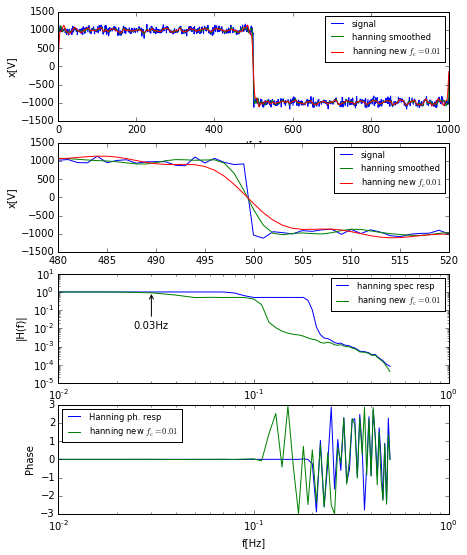

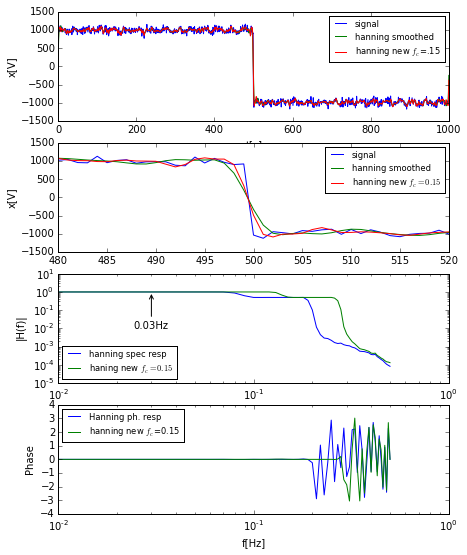

In [17]:
fc2=0.01
Xh2=np.fft.fft(xn)
Xh2[(ffh>fc2)&(ffh<(1./dt-fc2))]=1.e-15
yh2=np.real(np.fft.ifft(Xh2))+np.mean(xn)

Gyyh2,fy= mlab.psd(yh2,NFFT=nfft, Fs=1./dt, noverlap=nfft/2, window=mlab.window_hanning)
absHh2= np.sqrt(Gyyh2/Gxx)
Gxyh2, fxy= mlab.csd(xn,yh2,NFFT=nfft,Fs=1./dt, noverlap=nfft/2, window=mlab.window_hanning)
angh2= np.angle(Gxyh2)

fig,ax=plt.subplots(4,1,figsize=(7,9))
ax[0].plot(t,xn,label='signal')
ax[0].plot(t,yh, label='hanning smoothed')
ax[0].plot(t,yh2, label='hanning new $f_c=0.01$')
ax[0].set_ylabel('x[V]'); ax[0].set_xlabel('t[s]')
ax[0].legend(fontsize='small')

ax[1].plot(t,xn,label='signal')
ax[1].plot(t,yh, label='hanning smoothed')
ax[1].plot(t,yh2, label='hanning new $f_c0.01$')
ax[1].set_ylabel('x[V]'); ax[0].set_xlabel('t[s]')
ax[1].legend(fontsize='small')
ax[1].set_xlim((480,520))

#Spectral response
ax[2].loglog(fy, absHh, label='hanning spec resp')
ax[2].loglog(fy, absHh2, label='haning new $f_c=0.01$')
ax[2].annotate('0.03Hz', xy=(0.03, 1),  xycoords='data',
                xytext=(0.03, 1.e-2), textcoords='data',
                horizontalalignment='center',
                arrowprops=dict(arrowstyle="->")
                )
ax[2].set_xlabel('f[Hz]')
ax[2].set_ylabel('|H(f)|')
ax[2].legend(loc=0, fontsize='small')

#Phase response
ax[3].semilogx(fy, angh,label='Hanning ph. resp')
ax[3].semilogx(fy, angh2, label='hanning new $f_c=0.01$')
ax[3].set_xlabel('f[Hz]')
ax[3].set_ylabel('Phase')
ax[3].legend(loc=0, fontsize='small')


fc2=0.15
Xh2=np.fft.fft(xn)
Xh2[(ffh>fc2)&(ffh<(1./dt-fc2))]=1.e-15
yh2=np.real(np.fft.ifft(Xh2))+np.mean(xn)

Gyyh2,fy= mlab.psd(yh2,NFFT=nfft, Fs=1./dt, noverlap=nfft/2, window=mlab.window_hanning)
absHh2= np.sqrt(Gyyh2/Gxx)
Gxyh2, fxy= mlab.csd(xn,yh2,NFFT=nfft,Fs=1./dt, noverlap=nfft/2, window=mlab.window_hanning)
angh2= np.angle(Gxyh2)

fig,ax=plt.subplots(4,1,figsize=(7,9))
ax[0].plot(t,xn,label='signal')
ax[0].plot(t,yh, label='hanning smoothed')
ax[0].plot(t,yh2, label='hanning new $f_c$=.15')
ax[0].set_ylabel('x[V]'); ax[0].set_xlabel('t[s]')
ax[0].legend(fontsize='small')

ax[1].plot(t,xn,label='signal')
ax[1].plot(t,yh, label='hanning smoothed')
ax[1].plot(t,yh2, label='hanning new $f_c=0.15$')
ax[1].set_ylabel('x[V]'); ax[0].set_xlabel('t[s]')
ax[1].legend(fontsize='small')
ax[1].set_xlim((480,520))

#Spectral response
ax[2].loglog(fy, absHh, label='hanning spec resp')
ax[2].loglog(fy, absHh2, label='haning new $f_c=0.15$')
ax[2].annotate('0.03Hz', xy=(0.03, 1),  xycoords='data',
                xytext=(0.03, 1.e-2), textcoords='data',
                horizontalalignment='center',
                arrowprops=dict(arrowstyle="->")
                )
ax[2].set_xlabel('f[Hz]')
ax[2].set_ylabel('|H(f)|')
ax[2].legend(loc=0, fontsize='small')

#Phase response
ax[3].semilogx(fy, angh,label='Hanning ph. resp')
ax[3].semilogx(fy, angh2, label='hanning new $f_c$=0.15')
ax[3].set_xlabel('f[Hz]')
ax[3].set_ylabel('Phase')
ax[3].legend(loc=0, fontsize='small')

Having a cut off frequency at 0.01Hz instead of 0.06Hz does preserve the amplitude of the sine wave at 0.03Hz, but now the roll off is MUCH worse!
Having a cut off Frequcney at 0.15Hz also preserves he amplitude of the sine wave at 0.03Hz, and improves the roll off. 

## Q2: Implementing a bandpass filter

<div style='background:#F0F0F0'>**1** Create a red-noise process with 20000 data points, $dt=1\ s$.  Using a **truncated Dirichlet Kernel**, create a **bandpass** filter centered at $f_c=0.1\ Hz$ that has a passband that is approximately 0.1 Hz wide. Choose a filter length that is long enough to accomodate 0.1 Hz. 
</div>

   1. Plot the unshifted and shifted filters versus $k$, the time index.
   2. Plot the spectra, the response function $H^2(f)$ and the phase response
   3. Comment on your bandpass and if it indeed passed the right frequencies.

HINT: when you make the Dirichlet Kernel filter make sure that the $k=0$ case is treated "correctly" because $sin(0)=0$ and you will get a discontinuity.  Calculate what $h_0$ should be from [L'Hôpital's_rule](http://en.wikipedia.org/wiki/L'Hôpital's_rule).

Using L'hopital's rule to find h_0 gives h_0= M/N= 4001/20000 = 0.20005, 
which matches the graph's value for h_0 (unshifted)very nicely. 
But it does not match the shifted filter which is now double. 
the filter was also truncated to a length of 21=2*1/fc +1 when actually used to filter


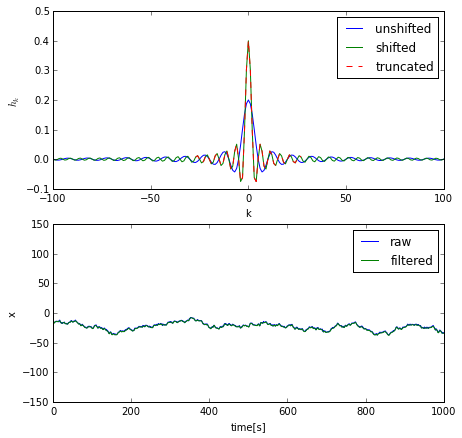

In [104]:
N=20000
t = np.arange(N*1.)
x = np.cumsum(np.random.randn(N))
x=x-np.mean(x)

dt=1.
fc=0.1
fs=1.
M=fc*2*N+1
k=np.array(range(-N/2+1, N/2))
m=k*1.
h2=(1./N)*np.sin(np.pi*(k+0.000001)*M/N)/np.sin(np.pi*(k+0.000001)/N)

H2=np.fft.fftshift(np.fft.fft(h2))
h2s=np.real(np.fft.ifft(H2))

filtlen=2*10+1
#h2=h2[abs(k)<filtlen+1]
H = 0.*k+1.
H[(np.abs(m)>(M)/2)]=0.
#gives bandpass centered on +/- fc=0.1
m2=0.1*N
hshift=2.*h2*np.cos(2*m2*np.pi*k/N)
#how long is filter: 
hshifttrun=hshift*1.
hshifttrun=hshifttrun[abs(k)<filtlen+7]
# filter now
y=np.convolve(x,hshifttrun,mode='same')

# try new thing: 
#Lower
fcL=0.05
ML=fcL*2*N+1
kL=np.array(range(-N/2+1, N/2))
mL=k*1.
hL=(1./N)*np.sin(np.pi*(k+0.000001)*ML/N)/np.sin(np.pi*(kL+0.000001)/N)
flen=1/fcL*2+1
hl=hL*1.; hl=hl[abs(kL)<flen+1]
yL=np.convolve(x,hl, mode='same')

#Upper
fcU=0.15
MU=fcU*2*N+1
kU=np.array(range(-N/2+1, N/2))
mU=k*1.
hU=(1./N)*np.sin(np.pi*(k+0.000001)*MU/N)/np.sin(np.pi*(kU+0.000001)/N)
fulen=1/fcU*2+1
fulen=15
hu=hU*1.; hu=hu[abs(kU)<fulen+1]
yU=np.convolve(x,hu, mode='same')

yul=yU-yL
Gul,ful=mlab.psd(yul, NFFT=100, Fs=1.)

#hul=hu-hl

#fig, ax=plt.subplots(1,1)
#ax.loglog(ful, Gul)


fig, ax=plt.subplots(2,1, figsize=(7,7))
ax[0].plot(k,h2, label= 'unshifted')
ax[0].plot(k,hshift,label='shifted')
#ax[0].plot(k,hU, label= 'upper')
#ax[0].plot(k,hL,label='lower')
ax[0].set_xlabel('k')
ax[0].set_ylabel('$h_k$')
ax[0].set_xlim([-100,100])
ax[0].plot(k[abs(k)<filtlen+7],hshifttrun,'r--', label='truncated')
ax[0].legend(loc=0)

ax[1].plot(t,x,label='raw')
ax[1].plot(t,y, label='filtered')
ax[1].set_xlabel('time[s]')
ax[1].set_ylabel('x')
ax[1].legend(loc=0)
ax[1].set_xlim([0,1000])
#ax[1].set_ylim([-100,100])

h=hshift*1.
filtlen=2.*10+1
h=h[abs(k)<filtlen+7]

print 'Using L\'hopital\'s rule to find h_0 gives h_0= M/N= 4001/20000 = 0.20005, '
print 'which matches the graph\'s value for h_0 (unshifted)very nicely. '
print 'But it does not match the shifted filter which is now double. '
print 'the filter was also truncated to a length of 21=2*1/fc +1 when actually used to filter'



In [91]:
N=20000
t = np.arange(N*1.)
x = np.cumsum(np.random.randn(N))
x=x-np.mean(x)

ufc=0.15
lfc=0.05
uXh=np.fft.fft(x)
lXh=np.fft.fft(x)
ff=np.linspace(0,1./dt,N)
hann=0.*ff
hann=np.hanning(N)
#ffh=np.convolve(ff,hann,mode='same')
ffh=ff*hann
uXh[(ffh>ufc)&(ffh<(1./dt-ufc))]=1.e-15
lXh[(ffh<lfc)&(ffh>(1./dt-lfc))]=1.e-15
uyh=np.real(np.fft.ifft(uXh))+np.mean(x)
lyh=np.real(np.fft.ifft(lXh))+np.mean(x)

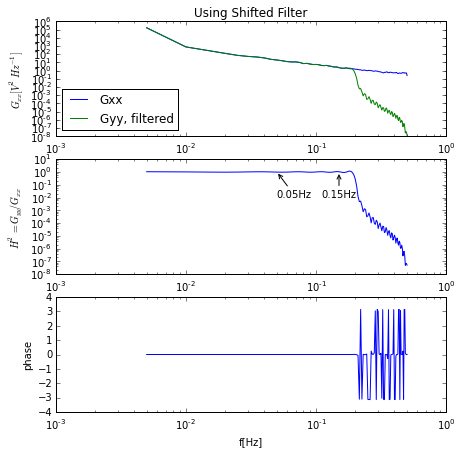

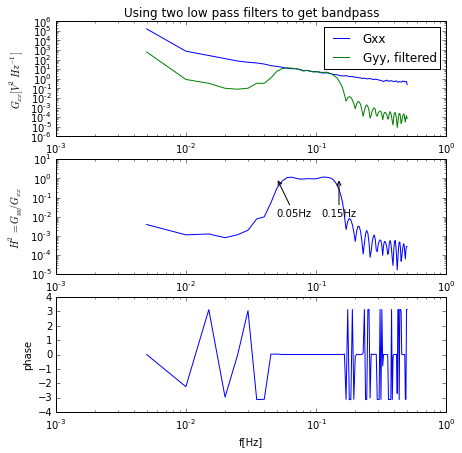

In [100]:
# filter now
y=np.convolve(x,hshifttrun,mode='same')
nfft=200
Gxx,fx=mlab.psd(x,Fs=1., NFFT=nfft, noverlap=nfft/2)
Gyy, fy=mlab.psd(y,Fs=1., NFFT=nfft, noverlap=nfft/2)
Gxy,fxy=mlab.csd(x,y,Fs=1., NFFT=nfft, noverlap=nfft/2)
phRes= np.angle(Gxy)
Hsq=abs(Gyy/Gxx)

fig,ax=plt.subplots(3,1,figsize=(7,7))
ax[0].loglog(fx,Gxx,label='Gxx')
ax[0].loglog(fx,Gyy,label='Gyy, filtered')
ax[0].set_xlabel('f[Hz]')
ax[0].set_ylabel('$G_{xx}[V^2 Hz^{-1}]$')
ax[0].legend(loc=0)
ax[0].set_title('Using Shifted Filter')

ax[1].loglog(fx,Hsq)
ax[1].set_xlabel('f[Hz]')
ax[1].set_ylabel('$H^2=G_{yy}/G_{xx}$')
ax[1].annotate('0.05Hz', xy=(0.05, 1),  xycoords='data',
                xytext=(0.05, 1.e-2), textcoords='data',
                horizontalalignment='centre',
                arrowprops=dict(arrowstyle="->")
                )
ax[1].annotate('0.15Hz', xy=(0.15, 1),  xycoords='data',
                xytext=(0.15, 1.e-2), textcoords='data',
                horizontalalignment='center',
                arrowprops=dict(arrowstyle="->")
                )

ax[2].semilogx(fx,phRes)
ax[2].set_xlabel('f[Hz]')
ax[2].set_ylabel('phase')
ax[2].legend(loc=0)

Gyy, fy=mlab.psd(yul,Fs=1., NFFT=nfft, noverlap=nfft/2)
Gxy,fxy=mlab.csd(x,yul,Fs=1., NFFT=nfft, noverlap=nfft/2)
phRes= np.angle(Gxy)
Hsq=abs(Gyy/Gxx)
fig,ax=plt.subplots(3,1,figsize=(7,7))
ax[0].loglog(fx,Gxx,label='Gxx')
ax[0].loglog(fx,Gyy,label='Gyy, filtered')
ax[0].set_xlabel('f[Hz]')
ax[0].set_ylabel('$G_{xx}[V^2 Hz^{-1}]$')
ax[0].legend(loc=0)
ax[0].set_title('Using two low pass filters to get bandpass')

ax[1].loglog(fx,Hsq)
ax[1].set_xlabel('f[Hz]')
ax[1].set_ylabel('$H^2=G_{yy}/G_{xx}$')
ax[1].annotate('0.05Hz', xy=(0.05, 1),  xycoords='data',
                xytext=(0.05, 1.e-2), textcoords='data',
                horizontalalignment='centre',
                arrowprops=dict(arrowstyle="->")
                )
ax[1].annotate('0.15Hz', xy=(0.15, 1),  xycoords='data',
                xytext=(0.15, 1.e-2), textcoords='data',
                horizontalalignment='center',
                arrowprops=dict(arrowstyle="->")
                )

ax[2].semilogx(fx,phRes)
ax[2].set_xlabel('f[Hz]')
ax[2].set_ylabel('phase')
ax[2].legend(loc=0)

I can get a band pass if I use the upper and lower filters that I made(2nd set of plots), but using my low pass filter that is shifted maybe doesn't work. The bottom set of plots is centered at 0.1 Hz, with a width of 0.1 hz!

## Q3: Bandpass the weather data

In [2]:
minutedata=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/MinuteData/DeepCoveNew.txt')[:,1]

dc=minutedata[np.isfinite(minutedata)]
import scipy.signal as signal

<p><div style='background:#F0F0F0'>
**1** Using `signal.filtfilt` and suitable  "elliptical" filters band-pass the daily signal from the minute-data from Deep Cove.  Plot the power spectrum of the unfiltered and filtered signals. </div>
</p>
<p>
<div style='background:#F0F0F0'>
HINT: Do a high pass and low pass.  Design using `ellipord` and `ellip`.  These functions allow you to try and design a bandpass directly, but I could not get it to work.  Do not be too draconian in your passband - i.e. make it relatively broad, but do try and suppress the peaks.  I found it easier to think in terms of "hours" rather than frequencies, but you can do it as frequencies as well.
</div>
</p>

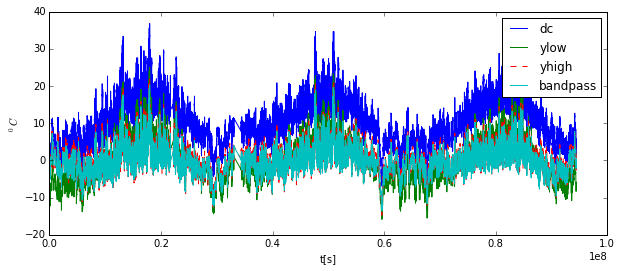

In [7]:
dcm=dc-np.mean(dc)
nfft=len(dc)/9
dt=60.
Gxx,f=mlab.psd(dc,NFFT=nfft, Fs=1./dt)

# make elliptical Filter
fNyqu=1./2/dt

freqDaily=1./24/60/60# in hertz
ws=10*freqDaily#pass band edge frequency
wp=1.25*freqDaily #stopband edge frequency
gpass=0.1 # max loss in passbanb
gstop=40.0# min attenuation in stopband
N,Wn=signal.ellipord(wp/fNyqu, ws/fNyqu,gpass,gstop)
b,a= signal.ellip(N,gpass/2,gstop/2,Wn,'low')
y=signal.filtfilt(b,a,dcm)

wsh=0.01*freqDaily#pass band edge frequency
wph=0.75*freqDaily #stopband edge frequency
Nh,Wnh=signal.ellipord(wph, wsh,gpass,gstop )
bh,ah= signal.ellip(Nh,gpass/2,gstop/2,Wnh,'high')
yh=signal.filtfilt(bh,ah,dc)
ybp=signal.filtfilt(bh,ah,y)
t=np.arange(0,len(dc)*60.,60)

fig, ax=plt.subplots(1,1, figsize=(10,4))
ax.plot(t,dc, label='dc')
ax.plot(t,y, label='ylow')
ax.plot(t,yh, '--',label='yhigh')
ax.plot(t,ybp,label='bandpass')
ax.legend(loc=0)
ax.set_xlabel('t[s]')
ax.set_ylabel('$^0C$')

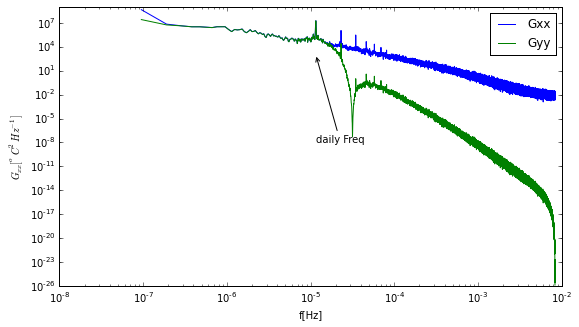

In [11]:
Gyy,f=mlab.psd(ybp,NFFT=nfft, Fs=1./dt)
fig, ax=plt.subplots(1,1, figsize=(9,5))

ax.loglog(f,Gxx, label='Gxx')
ax.loglog(f,Gyy, label='Gyy')
ax.set_xlabel('f[Hz]')
ax.set_ylabel('$G_{xx}[^oC^2Hz^{-1} ]$')
ax.legend(loc=1)
ax.annotate('daily Freq', xy=(freqDaily, 1000),  xycoords='data',
                xytext=(freqDaily, 1.e-8), textcoords='data',
                horizontalalignment='centre',
                arrowprops=dict(arrowstyle="->")
                )

<div style='background:#F0F0F0'> **2** Using your band passed signal, plot the *amplitude* of the daily cycle as a function of time, smoothed over a suitable time period. Compare with the raw timeseries to make sure your amplitudes make sense. Comment on the annual variation in the daily amplitude and if it makes sense with respect to the seasons.
</div>

(2592000, 7776000)

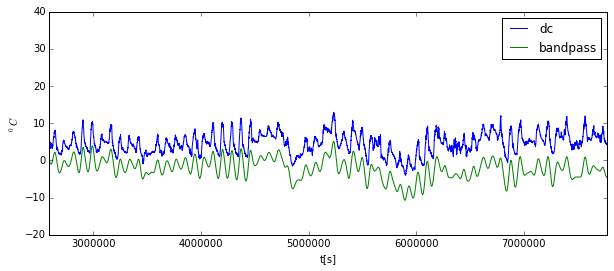

In [14]:
fig, ax=plt.subplots(1,1, figsize=(10,4))
ax.plot(t,dc, label='dc')
ax.plot(t,ybp,label='bandpass')
ax.legend(loc=0)
ax.set_xlabel('t[s]')
ax.set_ylabel('$^0C$')
ax.set_xlim(60*60*24*30,60*60*24*30*3 )